In [407]:
ITERATIONS = 20
import numpy as np

### Define Function f(x)

In [408]:
def f(x):
    return -(x**5)+5*(x**3)+20*x-5

---
### Some methods

In [409]:
### Initialize Position List
def Initialize_Position(List):
    return List

### Initialize Velocities
def Initialize_Velocities():
    return [0, 0, 0, 0]

### Get Local Best Position
def Get_Local_Best_Position(List, Current_Local_Best_Position):
    for i in range(4):
        if( f(List[i]) > f(Current_Local_Best_Position[i])):
            Current_Local_Best_Position[i] = List[i]
    # print(f'===== Get_Local_Best_Position =====')
    # print(f'Current_Local_Best_Position : {Current_Local_Best_Position}')
    # for j in range(4):
    #     print(f'Local_Best_Position_Value[{j}] : {f(Local_Best_Position[j])}')
    return Current_Local_Best_Position

### Get Global Best Position
def Get_Global_Best_Position(List, Global_Best_Position):
    # print(f'===== Get_Global_Best_Position =====')
    for i in range(4):
        if( f(List[i]) > f(Global_Best_Position)):
            Global_Best_Position = List[i]
    # print(f'Global_Best_Position : {Global_Best_Position}')
    # print(f'Global_Best_Position_Value : {f(Global_Best_Position)}')
    return Global_Best_Position

### Get Velocities of Particles
def Get_Velocities_of_Particles(Local_Best_Position,
                                Global_Best_Position,
                                Current_Velocities,
                                Current_Position):
    New_Velocities = Initialize_Velocities() # ?
    w = 0.2; c_1 = 0.4; c_2 = 0.4   # (original) w = c_1 = c_2 = 1
                                    # Somehow, the original assumption make\
                                    # \my algorithm failed when adding
                                    # \range constraint to the nodes.
                                    # Therefore, I adopt another settings.
    r_1 = np.random.uniform(0, 1, 1)
    r_2 = np.random.uniform(0, 1, 1)
    # print(f'===== Get_Velocities_of_Particles =====')
    # print(f'Local_Best_Position : {Local_Best_Position}')
    # print(f'Global_Best_Position : {Global_Best_Position}')
    # print(f'Current_Velocities : {Current_Velocities}')
    # print(f'Current_Position : {Current_Position}')
    # print(f'r_1, r_2: {r_1, r_2}')
    for i in range(4):
        New_Velocities[i] = w*Current_Velocities[i]\
                            + c_1*r_1*(Local_Best_Position[i]-Current_Position[i])\
                            + c_2*r_2*(Global_Best_Position-Current_Position[i])
        New_Velocities[i] = float(New_Velocities[i])
    print(f'New Velocities : {New_Velocities}')
    return New_Velocities

def Get_New_Positions(Velocities, Current_Position):
    # print(f'  ===== Get New Positions =====')
    # # print(f'xCurrent_Position : {Current_Position}')
    New_Positions = Current_Position
    for i in range(4):
        New_Positions[i] = Velocities[i] + Current_Position[i]
    print(f'New Positions : {New_Positions}')
    return New_Positions


## Let's Start

### Initialization

In [410]:
# Set Initial Positions
x = [-2, 0, 1, 3]
print(x)

Current_Position = Initialize_Position(x)
Current_Velocities = Initialize_Velocities()

# Initialize Local Best Position
Local_Best_Position = Current_Position

# Initialize Global Best Position
Global_Best_Position = Current_Position[0]
### Arbitrarily set a position as Global Best Position from Current_Position

# Claim a list to store historical positions, for plotting.
History_Position = []
History_Position = np.concatenate((History_Position, Current_Position), axis=0)
New_Position = Initialize_Position(x)

[-2, 0, 1, 3]


In [411]:
for i in range(ITERATIONS):
    print(f'\n Iters {i}')
    Local_Best_Position = Get_Local_Best_Position(Current_Position,
                                                  Local_Best_Position)
    Global_Best_Position = Get_Global_Best_Position(Current_Position,
                                                    Global_Best_Position)
    New_Velocities = Get_Velocities_of_Particles(Local_Best_Position,
                                                Global_Best_Position,
                                                Current_Velocities,
                                                Current_Position)
    # print(f'Current_Position:{Current_Position}')
    for j in range(4):
        New_Position[j] = New_Velocities[j] + Current_Position[j]

    while((max(New_Position)>4)|(min(New_Position)<-4)):
        # print(f'\n!!! New_Position out of range!')
        for k in range(4):
            Current_Position[k] = Current_Position[k] - New_Velocities[k]
        New_Velocities = Get_Velocities_of_Particles(Local_Best_Position,
                                                    Global_Best_Position,
                                                    Current_Velocities,
                                                    Current_Position)
        New_Position = Get_New_Positions(New_Velocities, Current_Position)

    Current_Position = New_Position
    Current_Velocities = New_Velocities
    #print(f'Current Position: \n {Current_Position}')
    History_Position = np.concatenate((History_Position, Current_Position), axis=0)
print(f'\nPSO converges at :{np.mean(History_Position[-5:-1])}, with optimal value : {f(np.mean(History_Position[-5:-1]))}')


 Iters 0
New Velocities : [0.05673488516576293, 0.018911628388587644, 0.0, -0.03782325677717529]

 Iters 1
New Velocities : [1.0941325816056304, 0.36471086053521007, 0.0, -0.7294217210704201]

 Iters 2
New Velocities : [0.8019215237859894, 0.42279917658595995, 0.2332380029859453, -0.14588434421408403]

 Iters 3
New Velocities : [0.9582625565311855, 0.5632867863815846, 0.36579890130678405, -0.029176868842816808]

 Iters 4
New Velocities : [0.30984751177063896, 0.18357435755495805, 0.12043778044711753, -0.005835373768563362]

 Iters 5
New Velocities : [0.3168832554215221, 0.18966312335142824, 0.12605305731638122, -0.0011670747537126725]

 Iters 6
New Velocities : [0.13390447120373994, 0.08024931674194696, 0.053421739511050455, -0.00023341495074253452]

 Iters 7
New Velocities : [0.11296936762666557, 0.06776294737993996, 0.04515973725657711, -4.6682990148506905e-05]

 Iters 8
New Velocities : [0.037075658023340244, 0.02224166017479227, 0.014824661250518272, -9.336598029701382e-06]

 Iter

### Plot the Movement of Particles

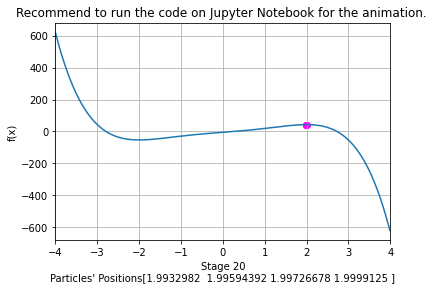

In [412]:
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
%matplotlib inline

fig = plt.figure()
# plt.ion()

for index in range(ITERATIONS+1):
    fig.clf()
    plt.title("Recommend to run the code on Jupyter Notebook for the animation. ")

    x = np.arange(-4, 4, 0.01)
    function = -(x**5)+5*(x**3)+20*x-5
    particles_location_x = History_Position[index*4:index*4+4]
    particles_location_y = f(History_Position[index*4:index*4+4])

    plt.scatter(particles_location_x,particles_location_y,c='magenta')

    # np.set_printoptions(precision=8)
    plt.xlabel(f"Stage {index}\nParticles' Positions{particles_location_x}")
    plt.ylabel("f(x)")

    LB = -4; UB = 4;
    # LB = 2*min(History_Position[index*4:index*4+4])\
    #          -max(History_Position[index*4:index*4+4])
    # UB = 2*max(History_Position[index*4:index*4+4])\
    #         -min(History_Position[index*4:index*4+4])

    plt.xlim(LB, UB)
    plt.plot(x, function)
    plt.grid()

    display.clear_output(wait=True)
    plt.pause(0.4)

# plt.ioff()

plt.show()
